In [56]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

<ErrorbarContainer object of 3 artists>

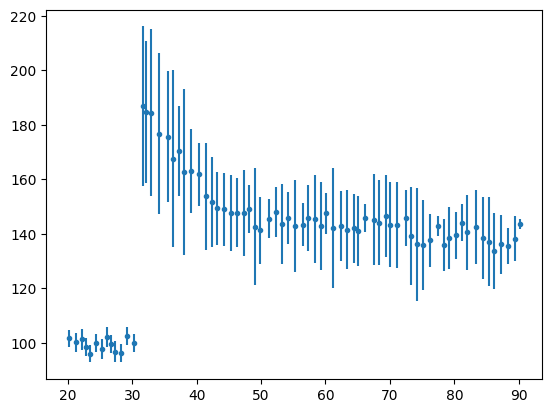

In [78]:
X = pd.read_csv('control_y.csv')['x'].to_numpy()
Y = pd.read_csv('control_y.csv')[' y'].to_numpy()
Y_ub = pd.read_csv('control_ub.csv')[' y'].to_numpy()[:-2]

Y_post = Y[Y>120]
Y_err_post = Y_ub - Y[Y > 120]

Y_pre = Y[Y<120]
std = Y_pre.std()

Y_err_pre = std + np.random.randn(len(Y_pre))*0.5 + 1


Y = np.concatenate([Y_pre, Y_post])
Y_err = np.concatenate([Y_err_pre, Y_err_post])

plt.errorbar(X, Y, Y_err, fmt='.')


In [76]:
df = pd.DataFrame(np.stack([X, Y, Y_err], axis=1))
df.to_csv('control.csv', index=False, header=False)